# TP4 - The Rosenbrock function

In [1]:
from typing import List

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# if matplotlib version is lower than 3.2.0, the following line is necessary.
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def rosenbrock(X,a):
    res=((1-X[0])**2 + a*a* (X[0]-X[1]**2)**2)
    return res

## Partie 1 -  Analyse graphique

### Question 1

In [3]:
def graph_Rosenbrock(a,X,Y):
    
    X_grid, Y_grid = np.meshgrid(X, Y)
    Grid = [X_grid, Y_grid]
    Z = rosenbrock(Grid,a)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_grid, Y_grid, Z, cmap='viridis', edgecolor='k')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    plt.title(f'Rosenbrock Function (a={a})')
    plt.show()

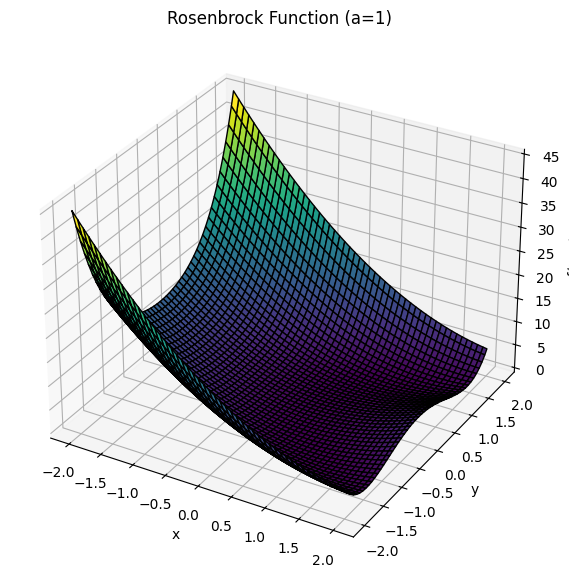

In [4]:
# Create the X and Y intervals (e.g., -2 to 2)
X = np.linspace(-2, 2, 200)
Y = np.linspace(-2, 2, 200)

# Choose a = 0.2, then plot
graph_Rosenbrock(a=1, X=X, Y=Y)

### Question 2

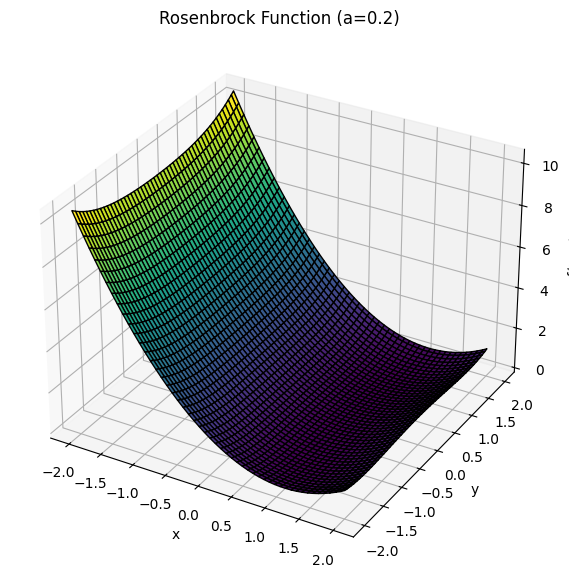

In [5]:
# Create the X and Y intervals (e.g., -2 to 2)
X = np.linspace(-2, 2, 200)
Y = np.linspace(-2, 2, 200)

# Choose a = 0.2, then plot
graph_Rosenbrock(a=0.2, X=X, Y=Y)

### Question 3

In [6]:
def graph_Rosenbrock_contour(a,X,Y,nb_lignes):
    
    X_grid, Y_grid = np.meshgrid(X, Y)
    Grid = [X_grid, Y_grid]
    Z = rosenbrock(Grid,a)

    plt.figure(figsize=(8, 6))
    contour = plt.contour(X_grid, Y_grid, Z, nb_lignes, cmap='viridis')
    plt.clabel(contour, inline=1, fontsize=8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Contour Plot of Rosenbrock Function (a={a})')
    plt.show()

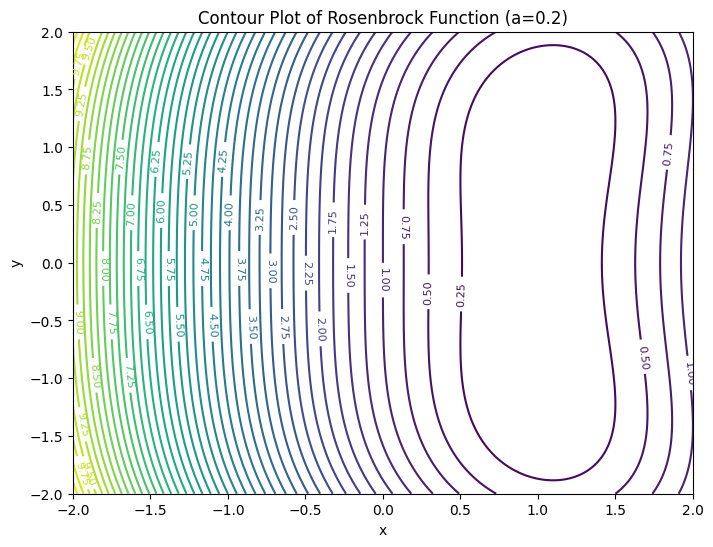

In [7]:
# Tracer les courbes de niveau avec a = 0.2
graph_Rosenbrock_contour(a=0.2, X=X, Y=Y, nb_lignes=50)

### Question 4

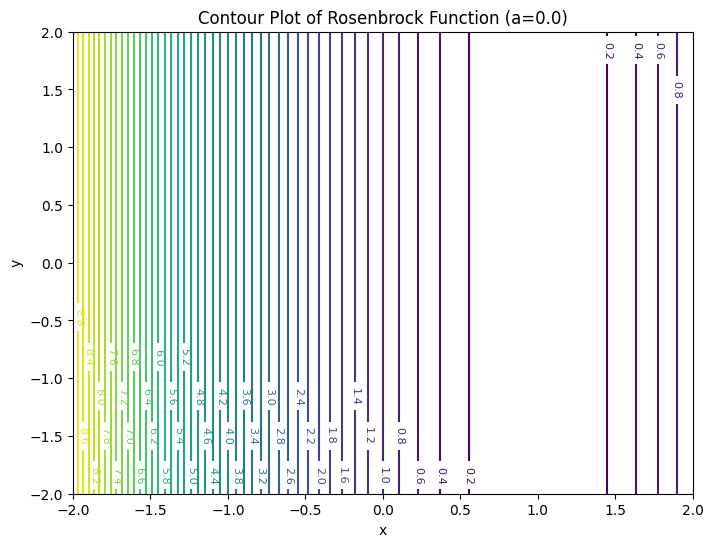

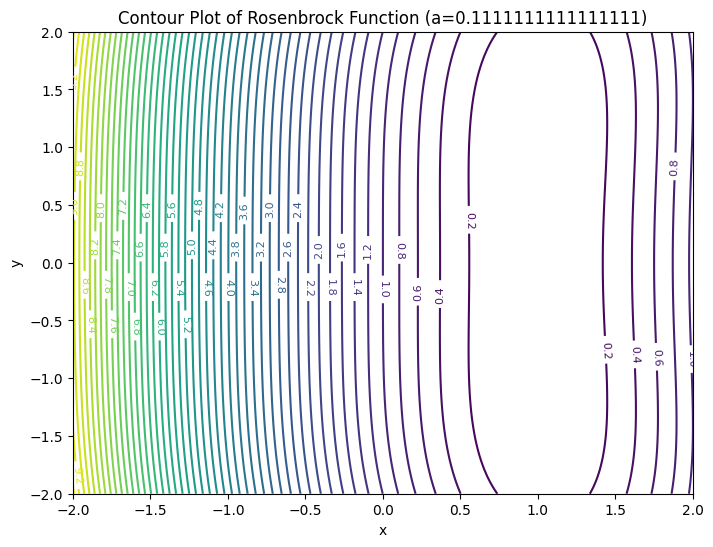

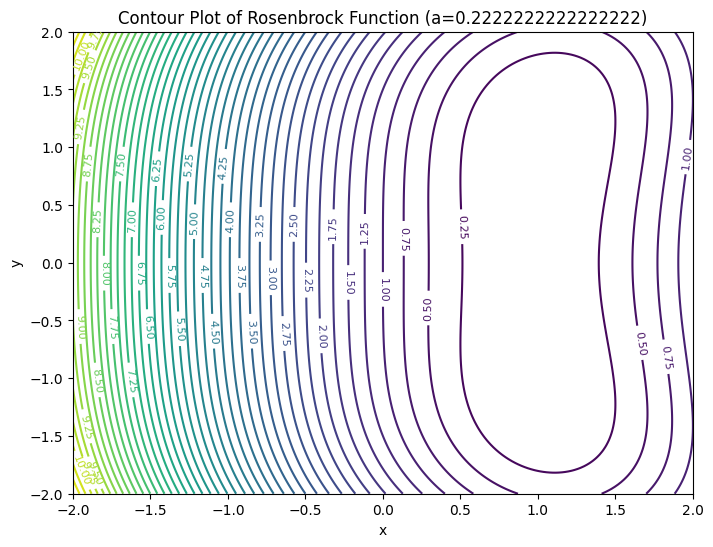

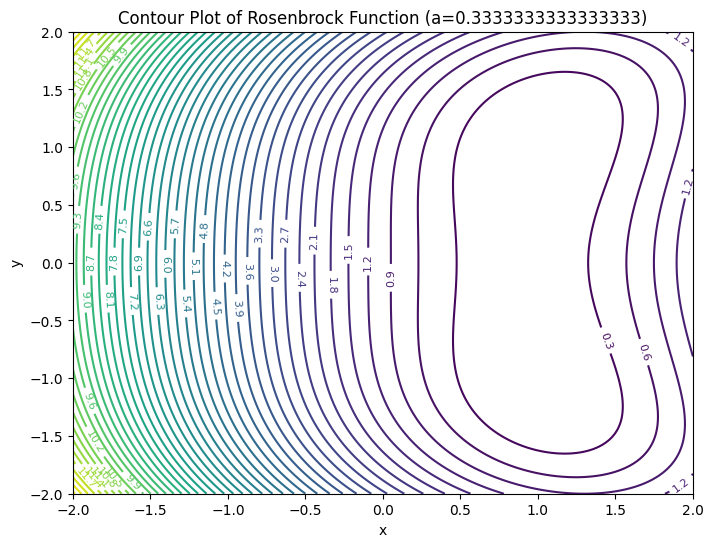

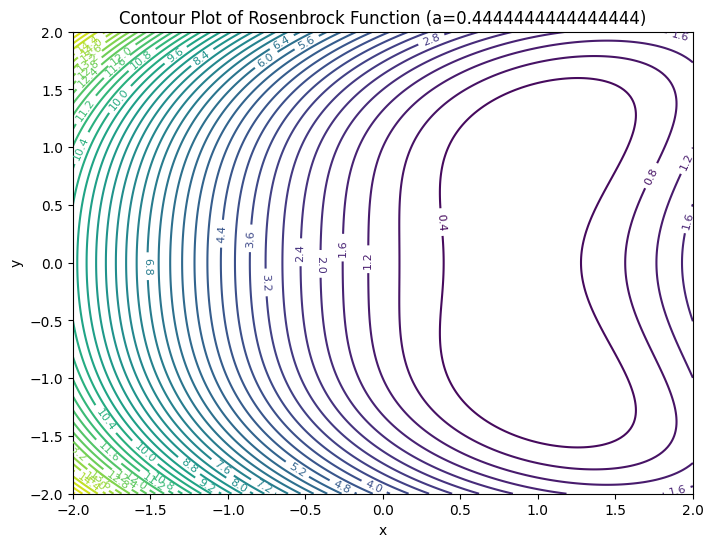

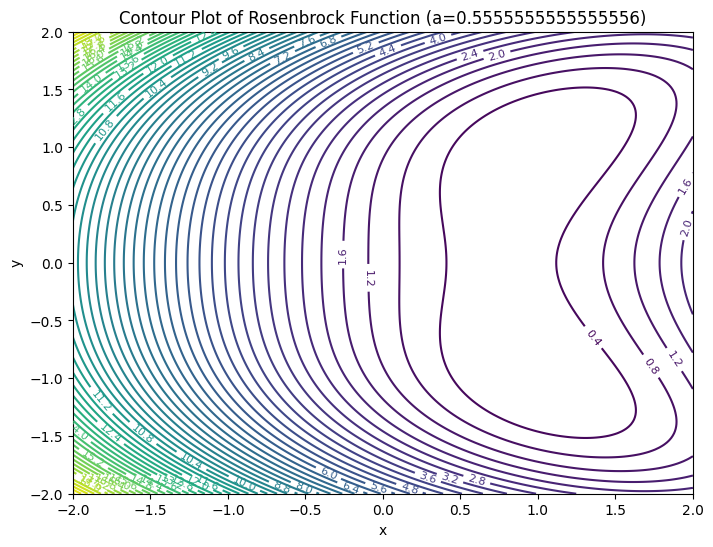

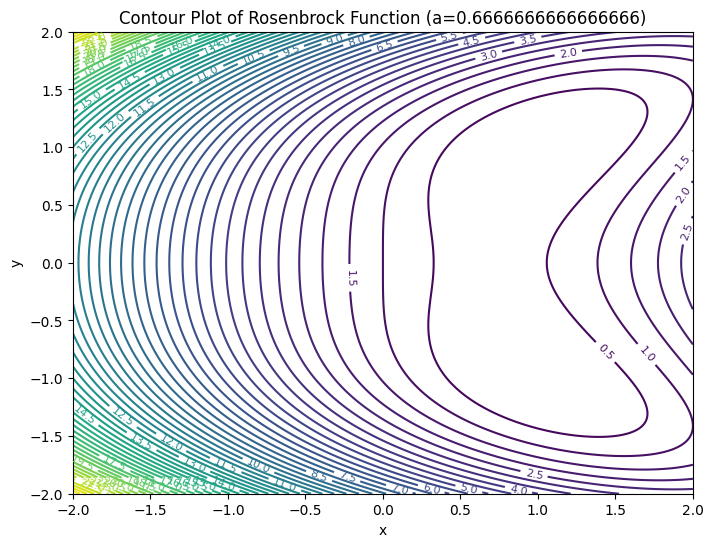

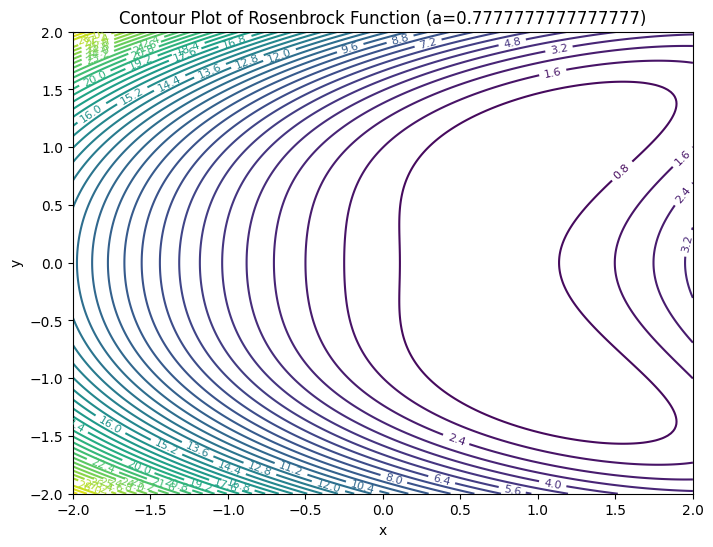

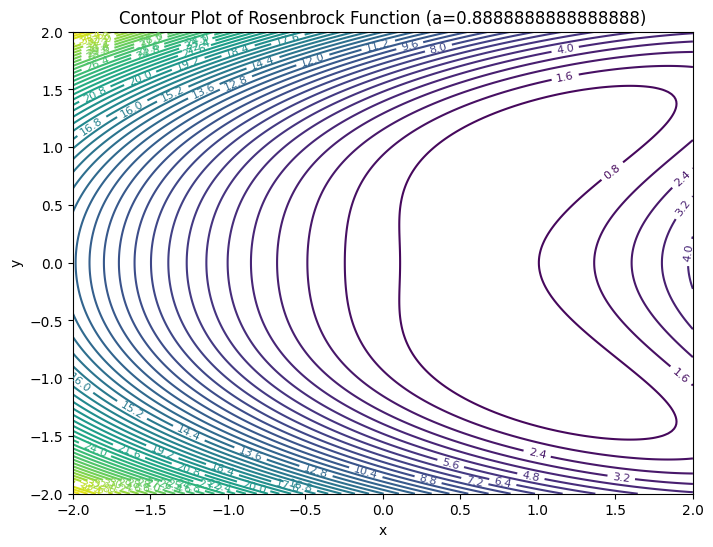

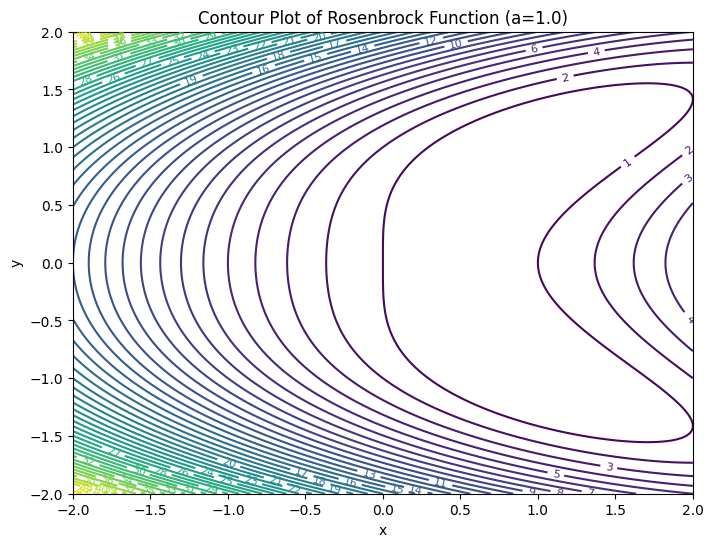

In [8]:
A=np.linspace(0,1,10)
for a in A:
    graph_Rosenbrock_contour(a,X,Y,50)

In [9]:
def graph_Rosenbrock_contour_bounding_box(a, X, Y, nb_lignes, bounding_box=None):
    X_grid, Y_grid = np.meshgrid(X, Y)
    Z = (1 - X_grid)**2 + a * (X_grid - Y_grid**2)**2

    plt.figure(figsize=(8, 6))
    contour = plt.contour(X_grid, Y_grid, Z, nb_lignes, cmap='viridis')
    plt.clabel(contour, inline=1, fontsize=8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Contour Plot of Rosenbrock Function (a={a})')

    if bounding_box:
        x_min, x_max, y_min, y_max = bounding_box
        plt.plot([x_min, x_max, x_max, x_min, x_min],
                 [y_min, y_min, y_max, y_max, y_min],
                 'r--', linewidth=2, label='Bounding Box')
        plt.legend()

    plt.show()

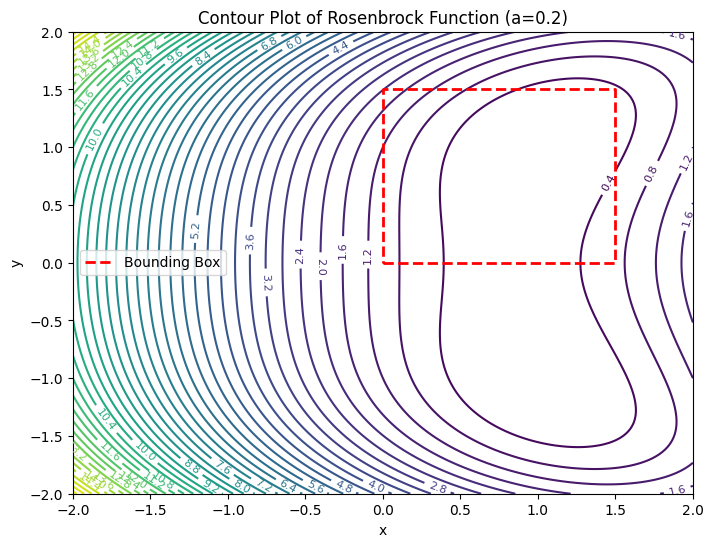

In [10]:
bounding_box = (0, 1.5, 0, 1.5)
graph_Rosenbrock_contour_bounding_box(a=0.2, X=X, Y=Y, nb_lignes=50, bounding_box=bounding_box)

## Partie 2 : Analyse symbolique


In [11]:
import sympy as sp
from IPython.display import display

### Question 1

In [12]:
x, y, a = sp.symbols('x y a')

# Définition de la fonction de Rosenbrock
sym_Rosenbrock = (1 - x)**2 + a**2 * (x - y**2)**2

# Affichage de la fonction
print("sym_Rosenbrock =")
sym_Rosenbrock

sym_Rosenbrock =


a**2*(x - y**2)**2 + (1 - x)**2

### Question 2

In [13]:
# Calcul du gradient de f
sym_gradient = sp.Matrix([sp.diff(sym_Rosenbrock, x), sp.diff(sym_Rosenbrock, y)])
print("Gradient de f =")
sym_gradient

Gradient de f =


Matrix([
[a**2*(2*x - 2*y**2) + 2*x - 2],
[         -4*a**2*y*(x - y**2)]])

### Question 3

In [14]:
# Résolution du système ∇f(x, y) = 0
solutions = sp.solve((sym_gradient[0], sym_gradient[1]), (x, y), dict=True)
print("Points critiques =")
solutions

Points critiques =


[{x: 1, y: -1}, {x: 1, y: 1}, {x: 1/(a**2 + 1), y: 0}]

### Question 4

In [15]:
# Calcul de la matrice Hessienne de f
Hess_f = sp.hessian(sym_Rosenbrock, (x, y))
print("Matrice Hessienne de f =")
Hess_f

Matrice Hessienne de f =


Matrix([
[2*a**2 + 2,                       -4*a**2*y],
[ -4*a**2*y, 8*a**2*y**2 - 4*a**2*(x - y**2)]])

### Question 5

In [16]:
# Evaluation de la Hessienne aux points critiques
Hess_a1 = Hess_f.subs({x: solutions[0][x], y: solutions[0][y]})
Hess_a2 = Hess_f.subs({x: solutions[1][x], y: solutions[1][y]})
Hess_a3 = Hess_f.subs({x: solutions[2][x], y: solutions[2][y]})

print("Hessienne en a1 =")
display(Hess_a1)
print("Hessienne en a2 =")
display(Hess_a2)
print("Hessienne en a3 =")
display(Hess_a3)

Hessienne en a1 =


Matrix([
[2*a**2 + 2, 4*a**2],
[    4*a**2, 8*a**2]])

Hessienne en a2 =


Matrix([
[2*a**2 + 2, -4*a**2],
[   -4*a**2,  8*a**2]])

Hessienne en a3 =


Matrix([
[2*a**2 + 2,                  0],
[         0, -4*a**2/(a**2 + 1)]])

### Question 6

In [21]:
# Calcul des valeurs propres pour a1 en utilisant eigenvects()
eigen_data_a1 = Hess_a1.eigenvects()
eig_a1 = [item[0] for item in eigen_data_a1]

# Calcul des valeurs propres pour a3 en utilisant eigenvects()
eigen_data_a3 = Hess_a3.eigenvects()
eig_a3 = [item[0] for item in eigen_data_a3]

print("Eigenvalues for a1:")
display(eig_a1)

print("Eigenvalues for a3:")
display(eig_a3)

Eigenvalues for a1:


[5*a**2 - sqrt((5*a**2 - 4*a + 1)*(5*a**2 + 4*a + 1)) + 1,
 5*a**2 + sqrt((5*a**2 - 4*a + 1)*(5*a**2 + 4*a + 1)) + 1]

Eigenvalues for a3:


[-4*a**2/(a**2 + 1), 2*a**2 + 2]

### Question 7

## Partie 3 : Analyse numérique

### Question 1

In [18]:
def rosenbrock_grad(X):
    

SyntaxError: incomplete input (2916087892.py, line 2)

### Question 2

In [ ]:
X = np.arange(0, 1.5, 0.2)
Y = np.arange(-1.5,1.5, 0.2)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock([X, Y],1)

x_init = [0.1, 0.9]

fx = rosenbrock(x_init,1);
gx = rosenbrock_grad(x_init);
s = -gx;
print(s)

ns = np.sqrt(s[0]**2+s[1]**2)
arrowxlen, arrowylen = s[0]/ns,s[1]/ns

plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([x_init[0]],[x_init[1]],marker='o',markersize=15, color ='r')
plt.arrow(x_init[0],x_init[1], arrowxlen, arrowylen, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.show()

### Question 3

### Question 4

In [ ]:
def gradient_descent(J_grad, x_init, alpha, max_iterations, epsilon=1e-10):
    

### Question 5


### Question 6

In [ ]:
def plot_trace_GD(iter_x, iter_y):

    # Plotting the Rosenbrock function and the Gradient Descent iteration steps
    X = np.linspace(0,   1.5, 20);
    Y = np.linspace(-1.5,1.5, 40);
    X, Y = np.meshgrid(X, Y);
    Z = rosenbrock([X, Y],1);
    #Angles needed for quiver plot
    anglesx = iter_x[1:] - iter_x[:-1]
    anglesy = iter_y[1:] - iter_y[:-1]
    fig = plt.figure(figsize = (16,8))
    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x,iter_y, rosenbrock([iter_x, iter_y],1),color = 'r', marker = '*', alpha = .4)
    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate iterate values
    ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
    ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Gradient Descent with {} iterations'.format(iter_count))
    plt.show()

In [ ]:
# Gradient descent test
x_init = np.array([0.1,0.9])
alpha = 0.1
max_iterations = 1000
x, iter_x, iter_y, iter_count = gradient_descent(rosenbrock_grad, x_init, alpha, max_iterations)
print("Final value:",x)
print("Number of iteration:",iter_count,"/",max_iterations-1)

In [ ]:
plot_trace_GD(iter_x, iter_y)

### Question 7

### Question 8

In [ ]:
def gss(f, a, b, tol=1e-10):
    phi = (np.sqrt(5) + 1) / 2
    d = b - (b - a) / phi
    c = a + (b - a) / phi

    while abs(d - c) > tol:
        if f(d) < f(c):
            b = c
        else:
            a = d

        d = b - (b - a) / phi
        c = a + (b - a) / phi

    return (a + b) / 2

def gradient_descent_optimal(J, J_grad, x_init, max_iterations, epsilon=1e-10):
    

### Question 9

### Question 10